In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                         names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "label"],
                         index_col=False)

In [3]:
# show data

print(f'Total entries: {len(df)}')
df.head(10)

Total entries: 32561


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [47]:
df.info(memory_usage=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

## Visualizations

<AxesSubplot: title={'center': 'Marital Status'}, xlabel='status', ylabel='entries'>

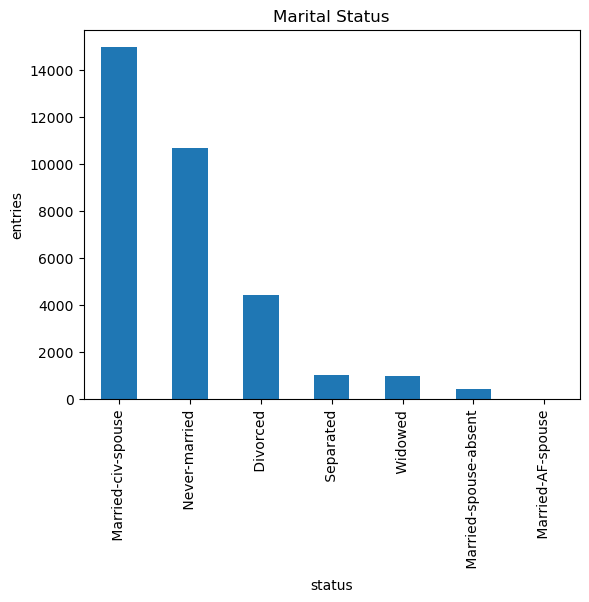

In [6]:
marital_stats = df['marital-status'].value_counts()
marital_stats.plot(xlabel="status", ylabel="entries", title="Marital Status", kind="bar")

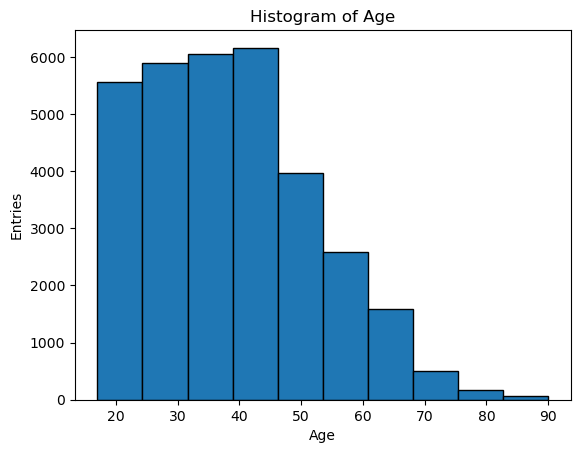

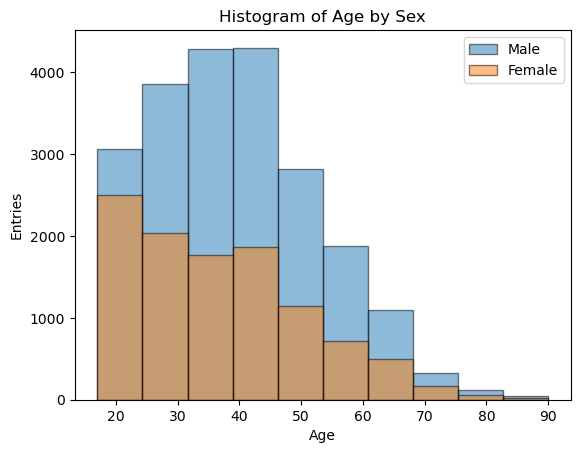

In [7]:
plt.hist(df['age'], bins=10, edgecolor='black', label='Overall')
plt.xlabel('Age')
plt.ylabel('Entries')
plt.title('Histogram of Age')
plt.show()

plt.figure()
plt.hist(df[df['sex'] == ' Male']['age'], bins=10, edgecolor='black', alpha=0.5, label='Male')
plt.hist(df[df['sex'] == ' Female']['age'], bins=10, edgecolor='black', alpha=0.5, label='Female')
plt.xlabel('Age')
plt.ylabel('Entries')
plt.title('Histogram of Age by Sex')
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'Income by highes education'}, xlabel='education'>

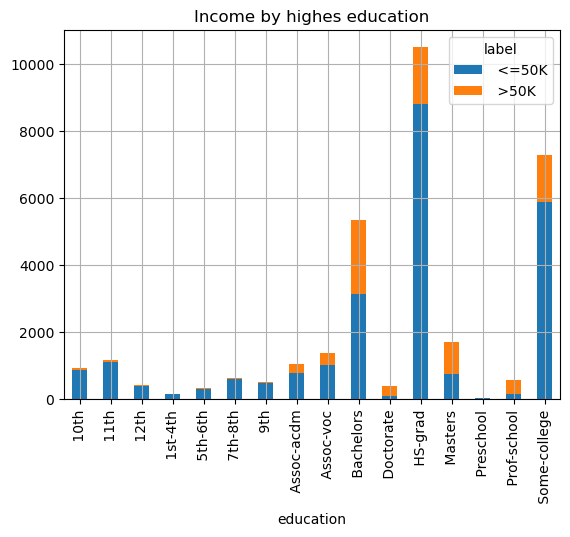

In [8]:
df.groupby('label')['education'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income by highes education")

<AxesSubplot: title={'center': 'Income sex distribution'}, xlabel='label'>

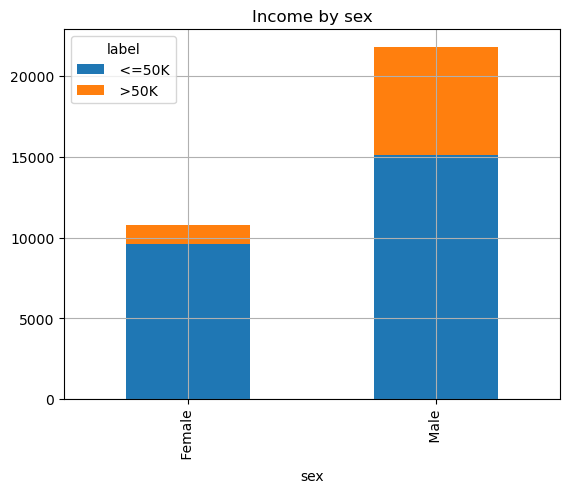

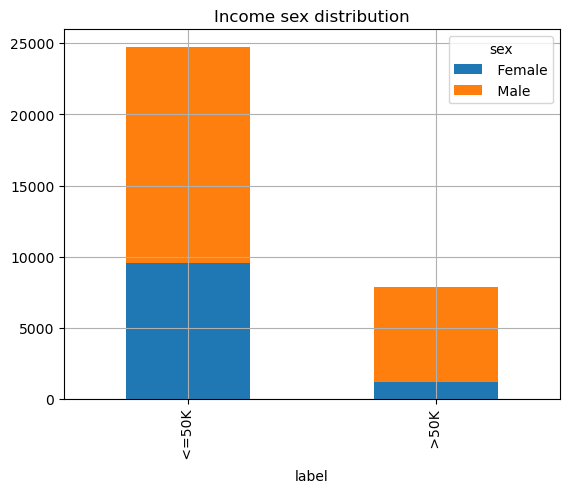

In [9]:
#Analyse sex compared to earnings
df.groupby('label')['sex'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income by sex")
df.groupby('sex')['label'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income sex distribution")

<AxesSubplot: title={'center': 'Income race distribution'}, xlabel='label'>

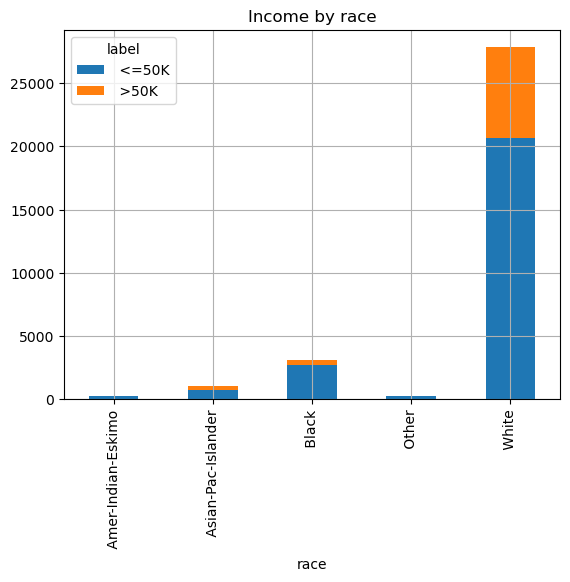

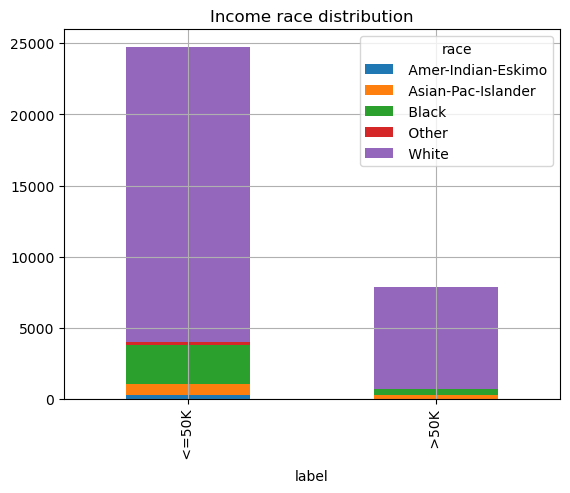

In [10]:
#Analyse race compared to earnings
df.groupby('label')['race'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income by race")
df.groupby('race')['label'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income race distribution")

<AxesSubplot: title={'center': 'Income workclass'}, xlabel='label'>

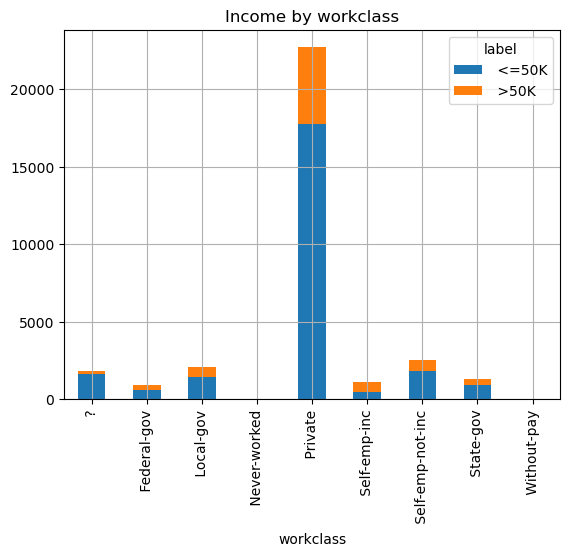

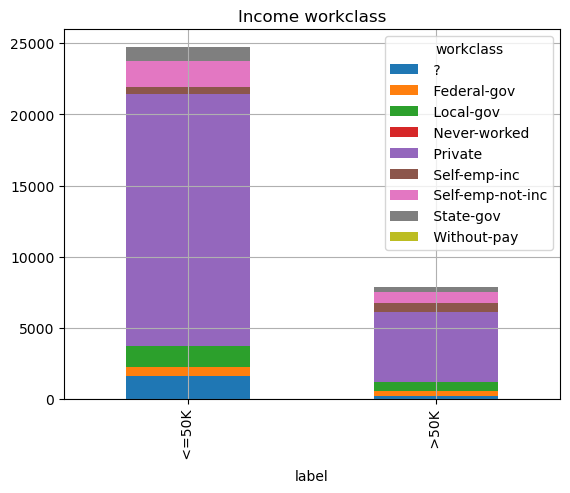

In [11]:
#Analyse workclass compared to earnings
df.groupby('label')['workclass'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income by workclass")
df.groupby('workclass')['label'].value_counts().unstack(0).plot(kind='bar', stacked = True, grid=True, title="Income workclass")